In [16]:
from planet4 import region_data, p4io as io

In [17]:
root = io.dropbox() / 'season23_catalog'

In [18]:
from planet4 import markings

In [19]:
def get_marking(line, cut=0.8):
    data = []
    for marking in ['fan_','blotch_']:
        m = line[line.index.str.startswith(marking)]
        data.append(m.rename_axis(lambda x: x[x.index('_')+1:]))
    fnotch = markings.Fnotch(line.fnotch_value, data[0], data[1])
    return fnotch.get_marking(cut)

In [21]:
def get_final_markings_counts(img_name, cut=0.5):
    d = {}
    d['image_name'] = img_name
    blotch_fname = root / '{}_blotches.csv'.format(img_name)
    d['n_blotches'] = len(pd.read_csv(blotch_fname))
    fan_fname = root / '{}_fans.csv'.format(img_name)
    d['n_fans'] = len(pd.read_csv(fan_fname))
    
    fnotch_fname = root / '{}_fnotches.csv'.format(img_name)
    df = pd.read_csv(fnotch_fname, index_col=0)
    for row in df.iterrows():
        marking = get_marking(row[1])
        if isinstance(marking, markings.Blotch):
            d['n_blotches'] +=1
        else:
            d['n_fans'] += 1
    return d

In [22]:
get_final_markings_counts('ESP_011351_0945')

{'image_name': 'ESP_011351_0945', 'n_blotches': 1782, 'n_fans': 2089}

In [116]:
with open('/Users/klay6683/Dropbox/data/planet4/season2_3_image_names.txt','w') as f:
    for i in (region_data.Inca.season2 + region_data.Inca.season3):
        f.write(i+'\n')

In [82]:
results = []
from IPython.display import display
from ipywidgets import IntProgress
t = IntProgress(min=0, max=len(region_data.Inca.season2)-1)
display(t)
for i, img_name in enumerate(region_data.Inca.season2):
    t.value = i
    results.append(get_final_markings_counts(img_name))

In [83]:
season2 = pd.DataFrame(results).sort_values(by='image_name')

In [57]:
%matplotlib inline

In [58]:
metadata = pd.read_csv("/Users/klay6683/Dropbox/data/planet4/P4_10-18-15_H_lat_lng.csv")

In [77]:
metadata.head(15)

,lat_centered,lng_east,binning,Object_time,solar_longitude,mars_time,north_azimuth,incidence_angle,sub_solar_azimuth,phase_angle,emission_angle,line_pixel_scale,sample_pixel_scale,pixel_resolution,mean_ground_resolution,labelpath,nsamples
HiRISE_image,,,,,,,,,,,,,,,,,
ESP_011296_0975,-82.197,225.253,4,2008-12-23T16:15:26.861,178.833,17.1368,110.5220,88.7496,33.9692,88.6680,0.126506,0.993333,0.993333,0.993333,0.993297,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,25379
ESP_011341_0980,-81.797,76.130,2,2008-12-27T04:25:02.363,180.809,17.1053,110.3550,87.7622,34.8539,87.9902,0.244628,0.493991,0.493991,0.493991,0.494061,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,34338
ESP_011348_0950,-85.043,259.094,4,2008-12-27T17:29:17.706,181.117,18.0259,123.6460,89.5608,33.8052,89.6876,0.155690,0.993521,0.993521,0.993521,0.993234,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,38984
ESP_011350_0945,-85.216,181.415,2,2008-12-27T21:14:01.135,181.205,16.4914,99.7306,87.6506,37.3171,108.1210,24.588300,0.539108,0.539108,0.539108,0.539336,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,17555
ESP_011351_0945,-85.216,181.548,4,2008-12-27T23:05:54.685,181.249,18.3165,127.9650,89.8666,33.8784,86.4021,4.123800,0.989757,0.989757,0.989757,0.990483,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,33247
ESP_011370_0980,-81.925,4.813,2,2008-12-29T10:39:09.516,182.088,17.1368,110.8050,87.3169,34.6865,85.9367,1.664760,0.498336,0.498336,0.498336,0.498381,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,19058
ESP_011394_0935,-86.392,99.068,4,2008-12-31T07:30:26.589,183.150,19.0773,139.4660,89.6666,33.6177,89.6491,0.022776,0.982442,0.982442,0.982442,0.983157,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,33266
ESP_011403_0945,-85.239,181.038,2,2009-01-01T00:21:03.206,183.549,16.9348,106.5850,87.1865,35.9206,102.2180,17.944400,0.516220,0.516220,0.516220,0.516571,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,23127
ESP_011404_0945,-85.236,181.105,4,2009-01-01T02:12:52.786,183.594,18.7543,134.2930,89.4106,33.8896,81.4188,9.519270,0.999692,0.999692,0.999692,1.000340,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,37878


In [60]:
from hirise.hirise_tools import get_rdr_label, labels_root

In [61]:
def get_nlines_from_label(labelfname):
    module = pvl.load(str(labelfname))
    return module['UNCOMPRESSED_FILE']['IMAGE']['LINE_SAMPLES']

In [62]:
p = labels_root()

In [63]:
metadata['labelpath'] = metadata.HiRISE_image.map(lambda x: p / (x + '_RED.LBL'))

In [64]:
metadata['nsamples'] = metadata.labelpath.map(get_nlines_from_label)

In [65]:
metadata.set_index('HiRISE_image', inplace=True)

In [84]:
season2.set_index('image_name', inplace=True)

In [86]:
season2 = season2.join(metadata['solar_longitude binning nsamples'.split()])

In [87]:
season2.set_index('solar_longitude', inplace=True)

In [88]:
counts.head()

,n_blotches,n_fans,binning,nsamples,both,scaled
solar_longitude,,,,,,
176.075,361,76,4,25352,437,0.004309
178.951,1217,179,2,40716,1396,0.017143
179.521,711,93,2,51314,804,0.007834
182.428,949,224,2,41025,1173,0.014296
188.901,1976,447,2,50896,2423,0.023803


In [89]:
season2['both'] = season2.n_blotches + season2.n_fans

In [96]:
season2.head(10)

,n_blotches,n_fans,binning,nsamples,both,scaled
solar_longitude,,,,,,
187.478,1546,319,2,70415,1865,0.013243
189.865,642,185,2,35322,827,0.011707
190.453,1011,239,2,33310,1250,0.018763
193.452,996,397,2,30651,1393,0.022724
197.073,1892,566,2,41019,2458,0.029962
198.318,1575,745,2,49747,2320,0.023318
206.291,1913,1223,2,40748,3136,0.038480
223.314,1622,1315,1,51209,2937,0.057353
226.522,2241,969,1,41042,3210,0.078213


In [95]:
counts.head(10)

,n_blotches,n_fans,binning,nsamples,both,scaled
solar_longitude,,,,,,
176.075,361,76,4,25352,437,0.004309
178.951,1217,179,2,40716,1396,0.017143
179.521,711,93,2,51314,804,0.007834
182.428,949,224,2,41025,1173,0.014296
188.901,1976,447,2,50896,2423,0.023803
207.777,1783,1305,1,41239,3088,0.074881
211.519,596,263,2,11120,859,0.038624
217.831,1363,819,1,31234,2182,0.069860
242.299,1368,652,1,36392,2020,0.055507


In [91]:
season2['scaled'] = season2.both / season2.nsamples / season2.binning

In [98]:
counts.index.min()

176.07499999999999

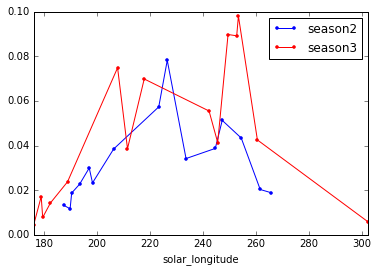

In [106]:
season2.scaled.plot(style='.-', xlim=(counts.index.min(), counts.index.max()), label='season2')
counts.scaled.plot(style='.-', color='red', label='season3')
plt.legend()

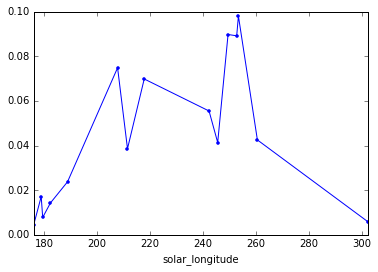

In [100]:
counts.scaled.plot(style='.-')

In [151]:
metadata.columns

Index(['lat_centered', 'lng_east', 'binning', 'Object_time', 'solar_longitude',
       'mars_time', 'north_azimuth', 'incidence_angle', 'sub_solar_azimuth',
       'phase_angle', 'emission_angle', 'line_pixel_scale',
       'sample_pixel_scale', 'pixel_resolution', 'mean_ground_resolution'],
      dtype='object')

In [152]:
metadata.head()

,lat_centered,lng_east,binning,Object_time,solar_longitude,mars_time,north_azimuth,incidence_angle,sub_solar_azimuth,phase_angle,emission_angle,line_pixel_scale,sample_pixel_scale,pixel_resolution,mean_ground_resolution
HiRISE_image,,,,,,,,,,,,,,,
ESP_011296_0975,-82.197,225.253,4,2008-12-23T16:15:26.861,178.833,17.1368,110.5220,88.7496,33.9692,88.6680,0.126506,0.993333,0.993333,0.993333,0.993297
ESP_011341_0980,-81.797,76.130,2,2008-12-27T04:25:02.363,180.809,17.1053,110.3550,87.7622,34.8539,87.9902,0.244628,0.493991,0.493991,0.493991,0.494061
ESP_011348_0950,-85.043,259.094,4,2008-12-27T17:29:17.706,181.117,18.0259,123.6460,89.5608,33.8052,89.6876,0.155690,0.993521,0.993521,0.993521,0.993234
ESP_011350_0945,-85.216,181.415,2,2008-12-27T21:14:01.135,181.205,16.4914,99.7306,87.6506,37.3171,108.1210,24.588300,0.539108,0.539108,0.539108,0.539336
ESP_011351_0945,-85.216,181.548,4,2008-12-27T23:05:54.685,181.249,18.3165,127.9650,89.8666,33.8784,86.4021,4.123800,0.989757,0.989757,0.989757,0.990483


In [120]:
pd.read_clipboard(header=None).mean()

0    248.852941
dtype: float64

In [1]:
from pysis import CubeFile

In [2]:
cube = CubeFile('/Users/klay6683/data/hirise/ESP_011544_0985_RGB.NOMAP.cub')

In [3]:
cube.bands

3